<a href="https://colab.research.google.com/github/The-Calculated-Life/python_analysis_for_excel/blob/main/End_Demo_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Analysis of Kiva Crowdfunded Loans** 

###### *Cory Stahle: Udemy Course Project Demo*
---



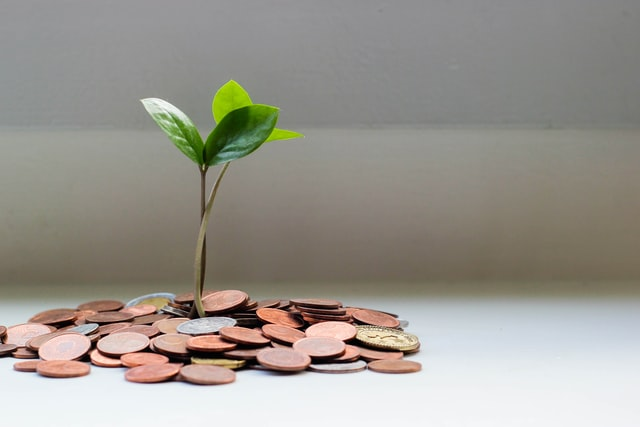

<span>Photo by <a href="https://unsplash.com/@micheile?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Micheile Henderson</a> on <a href="https://unsplash.com/s/photos/money?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

<br><br>

***Project structure:***


1.   Define the objective
2.   Import packages and data
3.   Explore and clean
4.   Analyze

<br>

## **Objective**
---

*Analyze the [Kiva.org](https://www.kiva.org/) lending platform. Understand how much money has been borrowed, for what purpose, and where the borrowers live.*

<br>

In particular, we want to answer the following groups of questions:



1.   How much money has been borrowed through Kiva's lending platform? How has the amount of funding changed over time?
2.   How much funding has been provided by category (theme)?
3.   How does funding vary by world region? What are the most popular themes in each region?


<br><br>

## **Import Packages and Data**
---


The data for this project comes from [Kaggle.com](https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding). It includes information about loans funded between January 1, 2014 and July 26th, 2017.

In [104]:
!pip install squarify

In [105]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import locale

# Apply settings for dollar formatting and chart size
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
plt.rcParams['figure.figsize'] = [12,6]

In [39]:
# Import data
kiva_loans_path = 'https://media.githubusercontent.com/media/The-Calculated-Life/python_analysis_for_excel/main/data/kiva_loans.csv'
locations_path = 'https://raw.githubusercontent.com/The-Calculated-Life/python_analysis_for_excel/main/data/kiva_mpi_region_locations.csv'

kiva_loans = pd.read_csv(kiva_loans_path)
locations = pd.read_csv(locations_path)

<br><br>

## **Explore and Clean Data**
---
You can also include notes here. Feel free to also include text between code cells throughout the notebook.

<br> 

#### **`kiva_loans` dataframe**

In [164]:
kiva_loans.head(3)

In [165]:
kiva_loans.shape

In [176]:
kiva_loans.isnull().sum()

In [42]:
kiva_loans['date'] = pd.to_datetime(kiva_loans['date'])
kiva_loans = kiva_loans.set_index('date')

In [163]:
kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval
date,,,,,,,,,,,,,,,,,,,
2014-01-01,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular
2014-01-01,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular
2014-01-01,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet


<br>

#### **`locations` dataframe**

In [166]:
locations.head()

In [167]:
locations.shape

In [177]:
locations.isnull().sum()

In [168]:
locations[(locations['world_region'].isnull()) & (locations['ISO'].notnull())]

In [171]:
locations = locations.loc[:, 'ISO':'world_region'].dropna()

In [172]:
locations.head()

,ISO,country,region,world_region
0,AFG,Afghanistan,Badakhshan,South Asia
1,AFG,Afghanistan,Badghis,South Asia
2,AFG,Afghanistan,Baghlan,South Asia
3,AFG,Afghanistan,Balkh,South Asia
4,AFG,Afghanistan,Bamyan,South Asia


<br><br>


## **Analysis**

### **Q. How much money has been borrowed through Kiva's lending platform?**


In [178]:
kiva_loans.head(1)

In [30]:
kiva_loans['funded_amount'].sum()

total_loans = locale.currency(kiva_loans['funded_amount'].sum(), grouping=True)

print('There has been ' + total_loans + ' in loans funded by Kiva')

There has been $527,563,815.00 in loans funded by Kiva


<br><br>

### **Q. How has the amount of funding changed over time?**


Kiva loans increased gradually between 2014 and May 2017. There appears to be some seasonality in loans. February levels are typically lower but are followed by a spike of activity in the Spring.

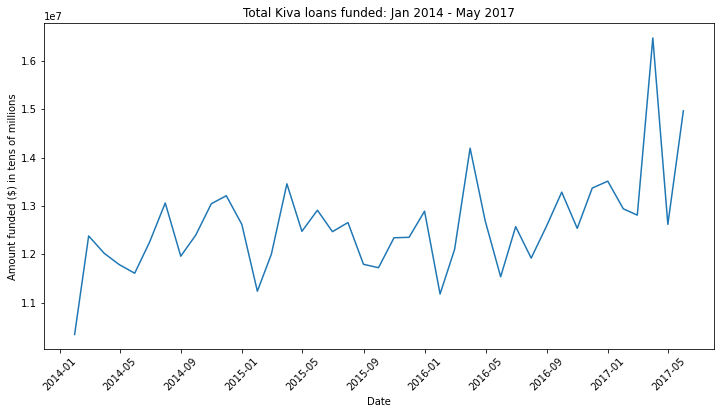

In [85]:
loans_by_day = kiva_loans.groupby('date')['funded_amount'].sum()

# plt.plot(loans_by_day)
# plt.show()

loans_by_month = loans_by_day.resample('M').sum()

loans_by_month = loans_by_month[loans_by_month.index < '2017-06-01']

plt.plot(loans_by_month)
plt.title('Total Kiva loans funded: Jan 2014 - May 2017')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Amount funded ($) in tens of millions')
plt.show()



<br><br>

### **Q. How much funding has been provided by sector?**

The largest sectors for Kiva funding are Agriculture, Food and Retail. The least funded sectors include wholesale, entertainment and manufacturing respectively.

In [81]:
loans_by_sector = kiva_loans.groupby('sector')['funded_amount'].sum()
loans_by_sector.sort_values(inplace=True, ascending=False)

In [179]:
loans_by_sector

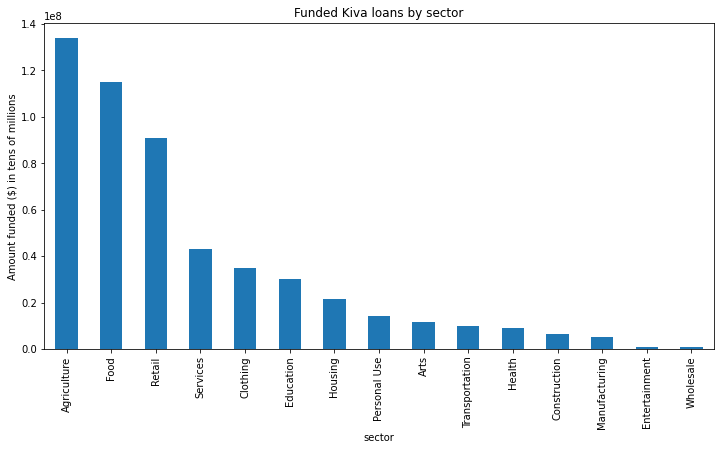

In [180]:
loans_by_sector.plot.bar()
plt.title('Funded Kiva loans by sector')
plt.ylabel('Amount funded ($) in tens of millions')
plt.show()

<br><br>

### **Q. How does funding vary by world region?**


The two largest recipients of Kiva funding are Latin America and East Asian countries.

In [158]:
kiva_loans.head(1)

In [159]:
locations.head(1)

In [102]:
loans_and_locations = kiva_loans.merge(locations, how='left', on='country')

In [107]:
loans_by_wregion = loans_and_locations.groupby('world_region')['funded_amount'].sum()

In [150]:
colors = [(0.953125720876586, 0.9822068435217225, 0.9426989619377163, 1.0),
 (0.12110726643598617, 0.5312572087658592, 0.2590542099192618, 1.0),
 (0.9686274509803922, 0.9882352941176471, 0.9607843137254902, 1.0),
 (0.0, 0.26666666666666666, 0.10588235294117647, 1.0),
 (0.9664129181084199, 0.9873740868896579, 0.9582006920415225, 1.0),
 (0.4798154555940023, 0.7802537485582468, 0.48322952710495964, 1.0)]

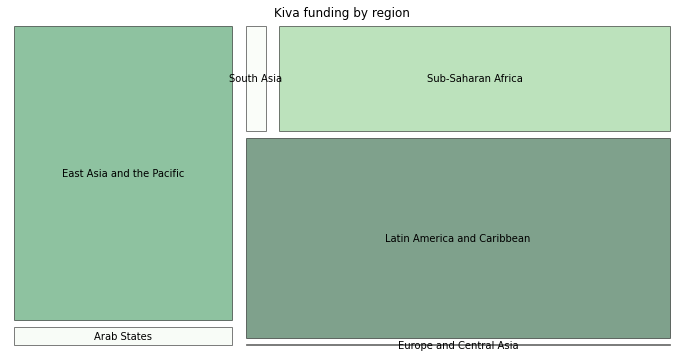

In [151]:
squarify.plot(sizes=loans_by_wregion, label=loans_by_wregion.index, color=colors, alpha=0.5, edgecolor='black', pad=True)
plt.title('Kiva funding by region')
plt.axis('off')
plt.show()

<br><br>

### **Q. What are the most popular sectors in each region?**

Agriculture has the highest amount of funding in East Asia, Europe, Latin America and Sub-Saharan Africa.

Service sectors are the largest in the Arab States and South Asia.

In [160]:
loans_and_locations.head()

In [161]:
sector_region_pivot = loans_and_locations.pivot_table(index='sector'
                                                      , columns='world_region'
                                                      , values='funded_amount'
                                                      , aggfunc='sum'
                                                      , fill_value=0
                                                      ) 

# sector_region_pivot

In [157]:
sector_region_pivot.style.highlight_max(color = 'lightgreen', axis = 0)

world_region,Arab States,East Asia and the Pacific,Europe and Central Asia,Latin America and Caribbean,South Asia,Sub-Saharan Africa
sector,,,,,,
Agriculture,12950575,411480600,23581250,507217450,10446000,289234930
Arts,881925,23713900,225250,81647225,6438300,5648350
Clothing,7598600,22651975,3731750,131111300,3943800,73482550
Construction,4685250,9755625,421750,25029175,896925,9835295
Education,17700975,52610550,9230375,78948775,8404125,41704975
Entertainment,158775,1244650,61375,2733800,72900,564700
Food,19054625,279280825,6550250,467501500,9515175,242758885
Health,950825,5953375,6101625,15294250,884625,13211175
Housing,6418575,95765350,3817625,85400500,16500,17573900
